In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [3]:
import yt
from yt.units import second, g, cm ,dyne
G = 6.674e-8*cm**3/second**2/g
ctr= 2.5e18*cm

In [5]:
ctr = 5e18*cm

In [6]:
def _r(field,data):
    r = sqrt((data["x"]-ctr)**2+(data["y"]-ctr)**2+(data["z"]-ctr)**2)
    return r
def _v_mag(field,data):
    return sqrt(data['velocity_x']**2+data['velocity_y']**2+data['velocity_z']**2)
def _omega(field,data):
    return sqrt(data['velocity_x']**2+data['velocity_y']**2+data['velocity_z']**2)/(data["r"]+(1.e-18*cm))
yt.add_field("r",function= _r,units="cm")
yt.add_field("v_mag",function= _v_mag,units="cm/s")
yt.add_field("omega",function= _omega,units="1/s")

from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null

def compute_current_time(timestep):
    ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    return  ds.current_time
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    if particle : 
        data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)
        pcl_indx_at_t = np.where(np.isclose(int(ds.current_time.in_cgs()),data[:,1]))[0]
        print "Number of sink particles: " , len(pcl_indx_at_t)
        pcl_pos_at_t = data[pcl_indx_at_t,2:5]
        for pos in pcl_pos_at_t:
            slc.annotate_marker(pos, coord_system='data',marker='.',plot_args={'color':'black','s':3})
    slc.show()

def plot_vmag(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="v_mag"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()

def plot_omega(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="omega"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()

def compute_omega(beta):
    M =  4.53382324263e+36
    G= 6.67e-8
    rmax = 16.9
    return sqrt(3*G*M*beta/(rmax/1.057e-17)**3)

### See if the non-rotating $\beta=0$ model,  has OOM increase in v_mag:

#### With Sinks:  (goes up to timestep 49, but cfl accidentally set as 0.3)

In [10]:
cd ../0beta_sink/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/0beta_sink


0.0 code_time



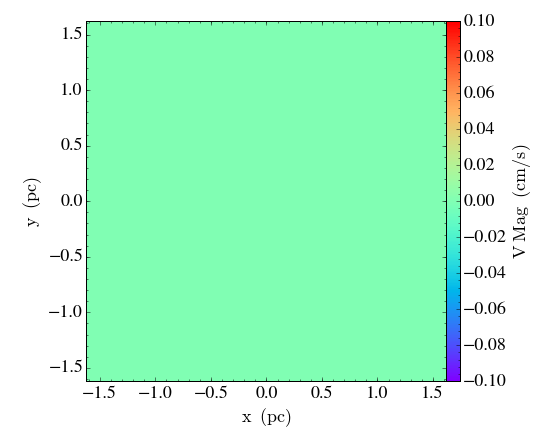

53554430000.0 code_time



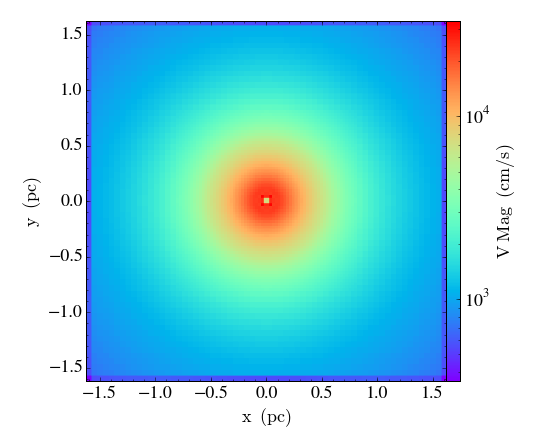

93554430000.0 code_time



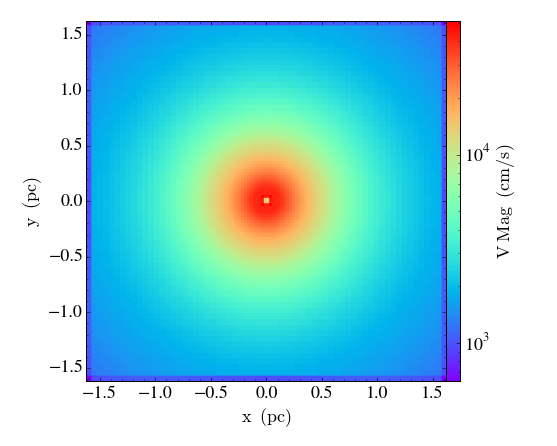

1.5355443e+11 code_time



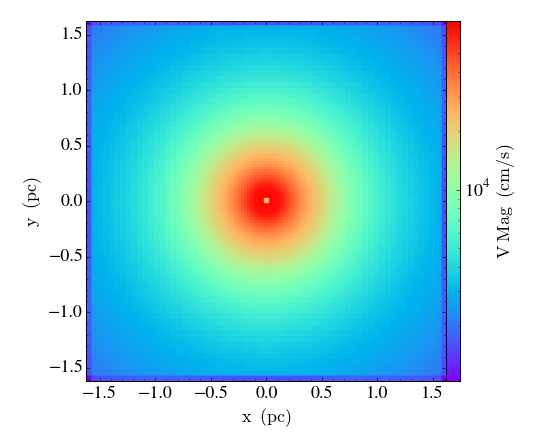

In [11]:
for i in [0,3,5,8]:
    print compute_current_time(i)
    plot_vmag(i)


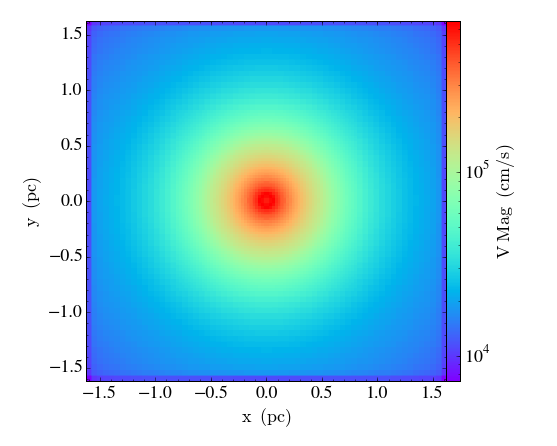


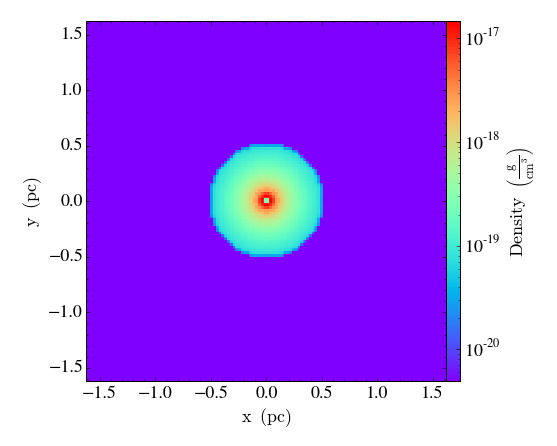

In [12]:
i=49
t_end_sink = compute_current_time(i)
plot_vmag(i)
plot_dens(i)

#### There's a 3 OOM increase in Vmag in the outside of the box at non-t=0 timesteps. But since this is also observed in the non-rotating case, the 10^3 velocity probably comes from the collapse and not the rotation that I put in. 

#### With no sinks (ran until 56): 

In [13]:
cd ../0beta_no_sink/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/0beta_no_sink



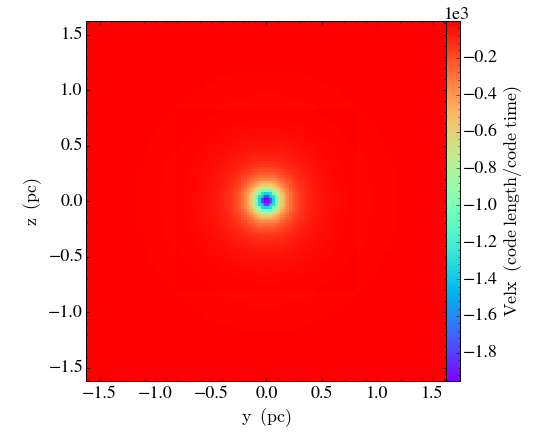

In [14]:
i = 1
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velx"
slc = yt.SlicePlot(ds, "x",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.set_cmap("all","rainbow")
slc.show()

0.0 code_time



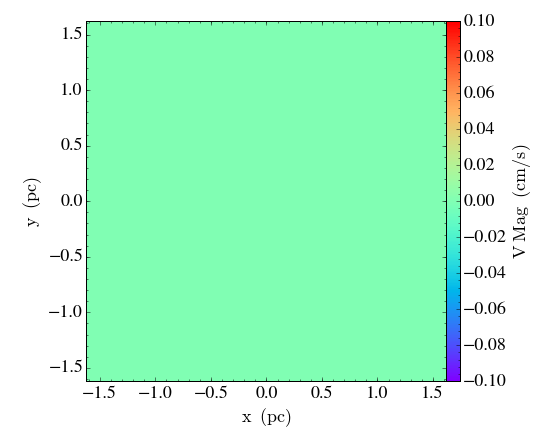

93554430000.0 code_time



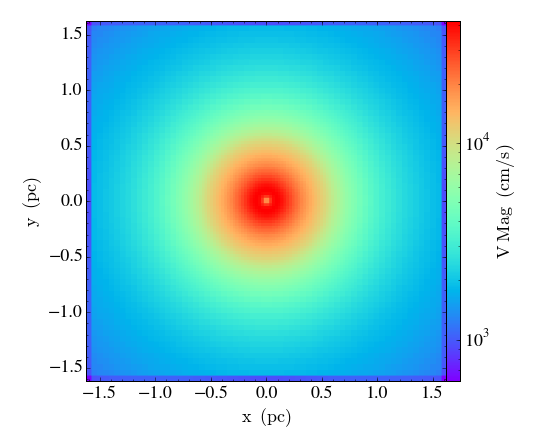

1.9355443e+11 code_time



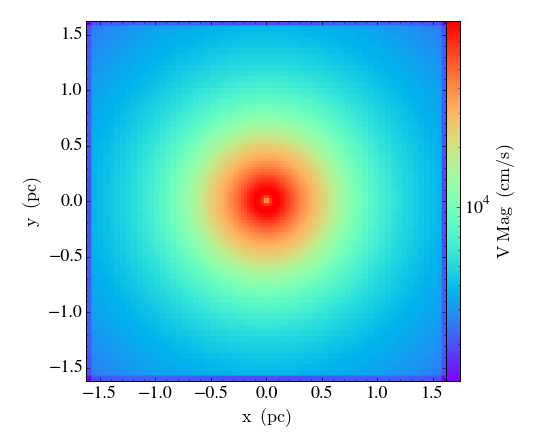

2.9355443e+11 code_time



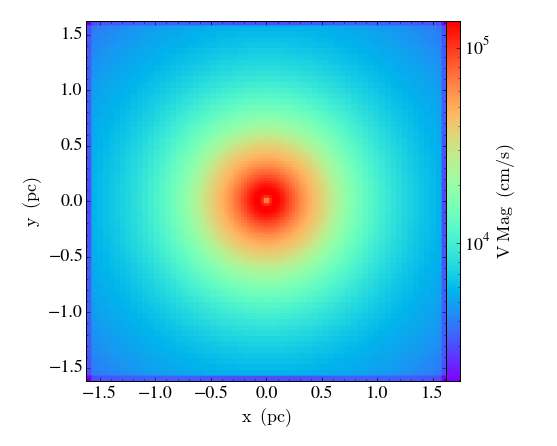

3.9355443e+11 code_time



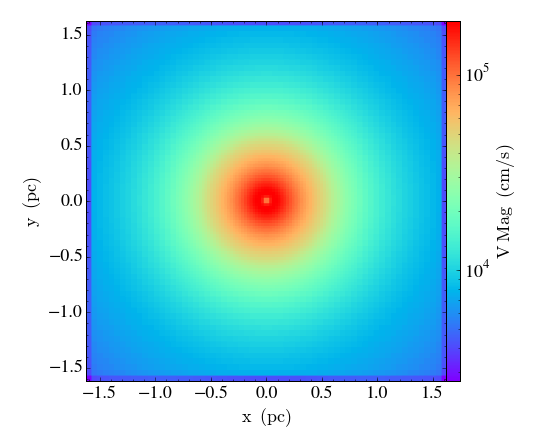

4.9355443e+11 code_time



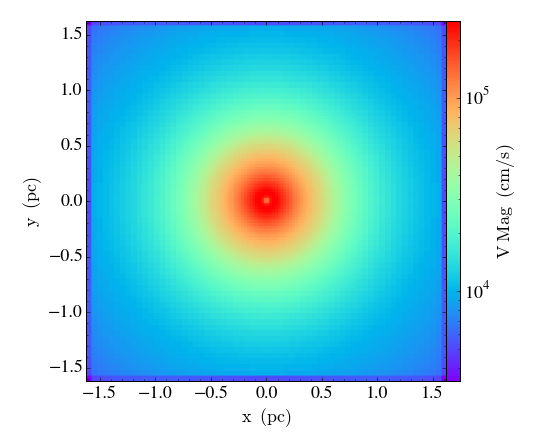

5.9355443e+11 code_time



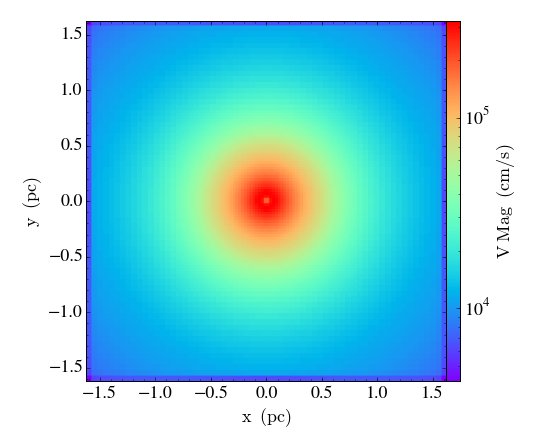

6.9355443e+11 code_time



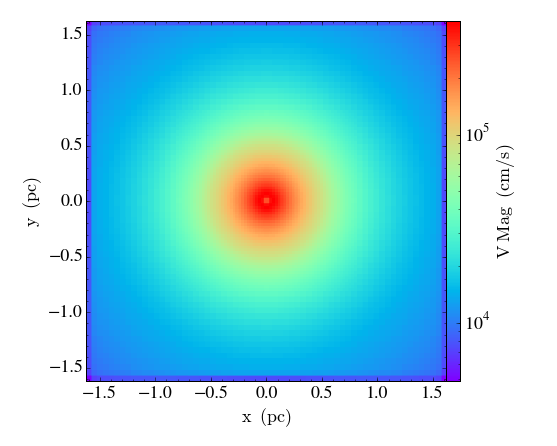

7.9355443e+11 code_time



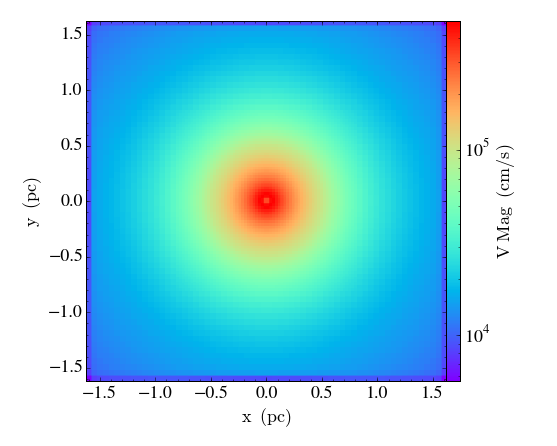

8.9355443e+11 code_time



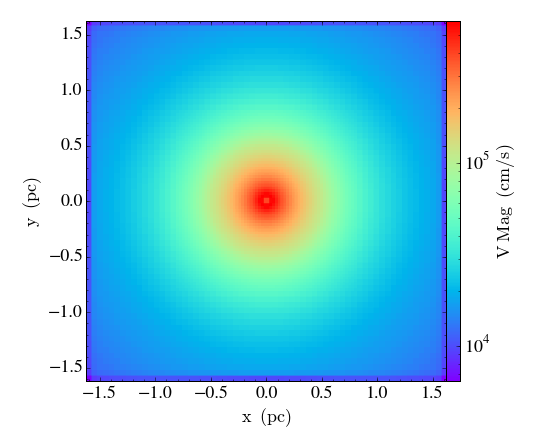

9.9355443e+11 code_time



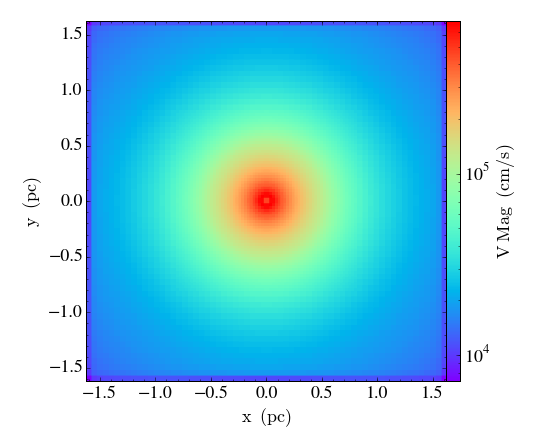

1.09355443e+12 code_time



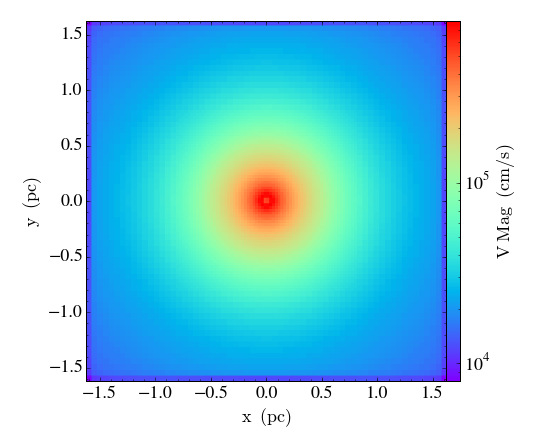

In [15]:
for i in np.arange(56):
    if i%5 ==0:
        print compute_current_time(i)
        plot_vmag(i)

0.0 code_time



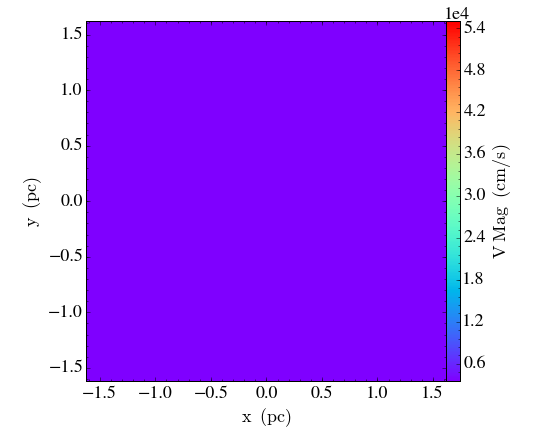

93554430000.0 code_time



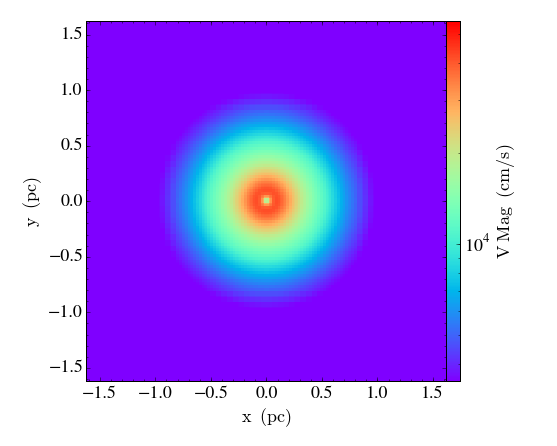

1.9355443e+11 code_time



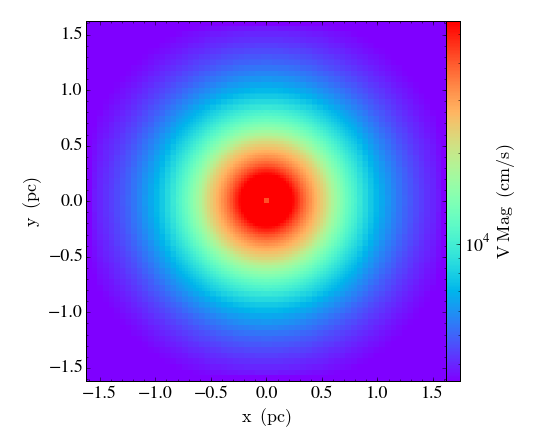

2.9355443e+11 code_time



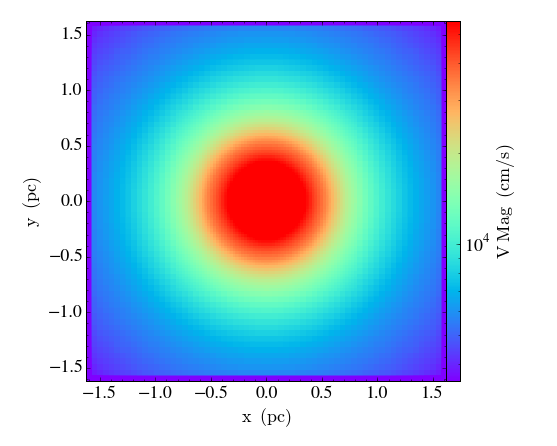

3.9355443e+11 code_time



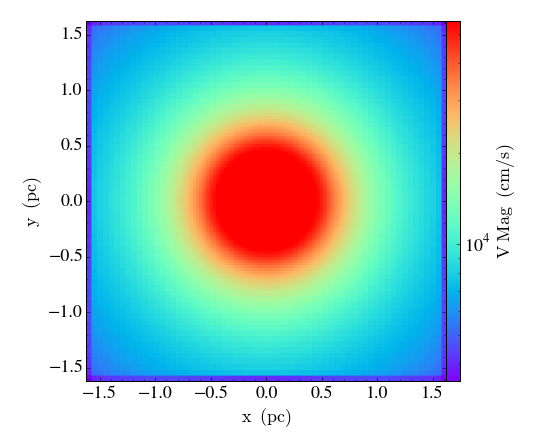

4.9355443e+11 code_time



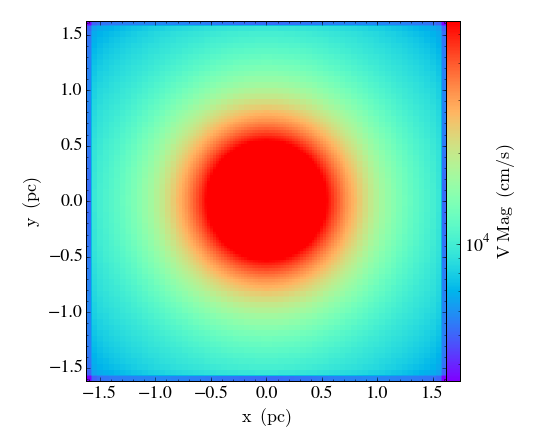

5.9355443e+11 code_time



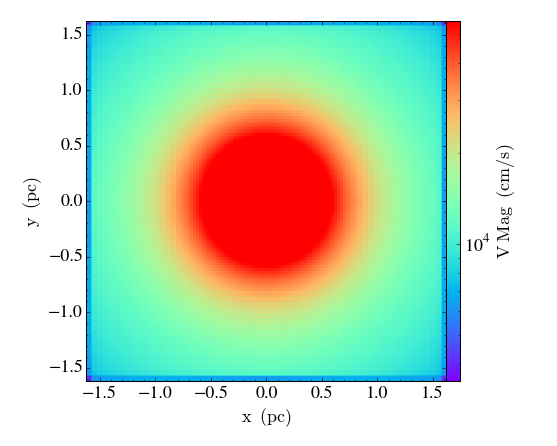

6.9355443e+11 code_time



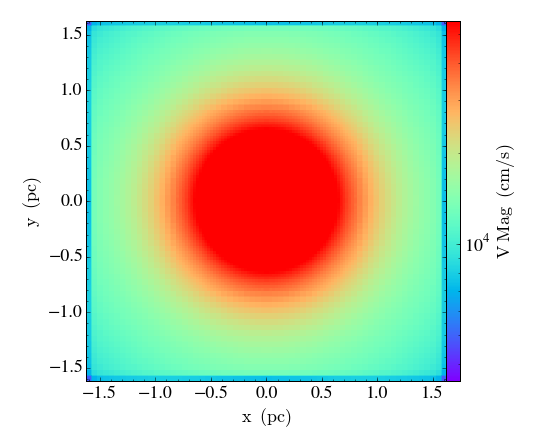

7.9355443e+11 code_time



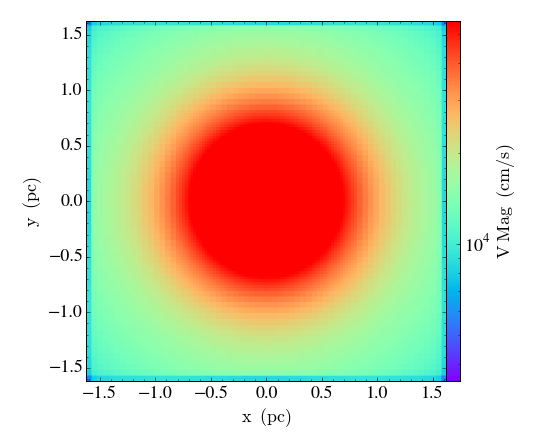

8.9355443e+11 code_time



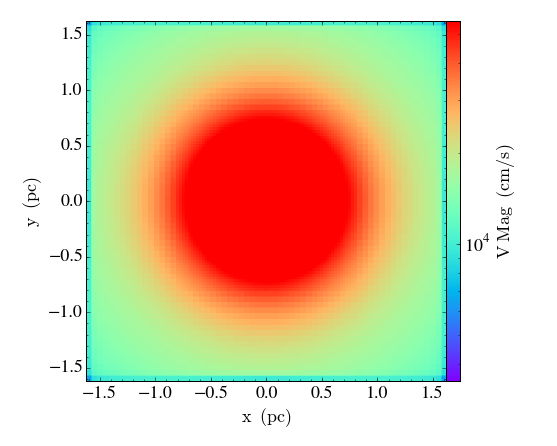

9.9355443e+11 code_time



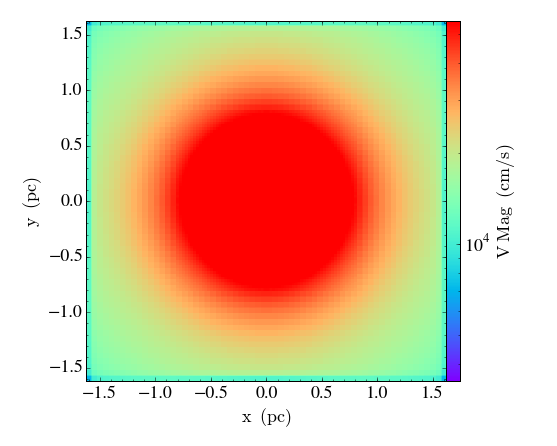

1.09355443e+12 code_time



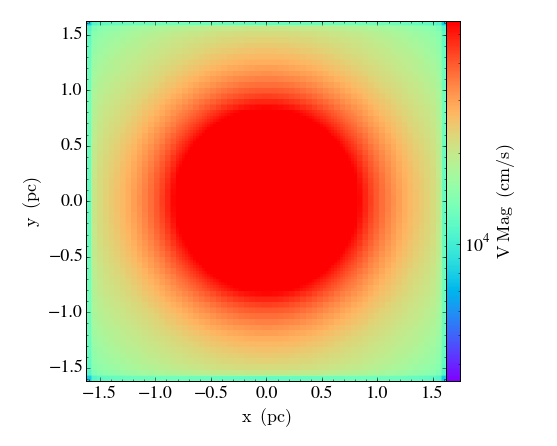

In [16]:
for i in np.arange(56):
    if i%5 ==0:
        print compute_current_time(i)
        plot_vmag(i,zmin=3.5e3,zmax =5.5e4 )

1.11355443e+12 code_time



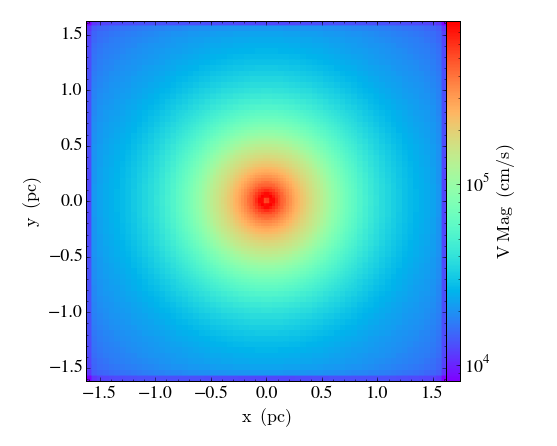


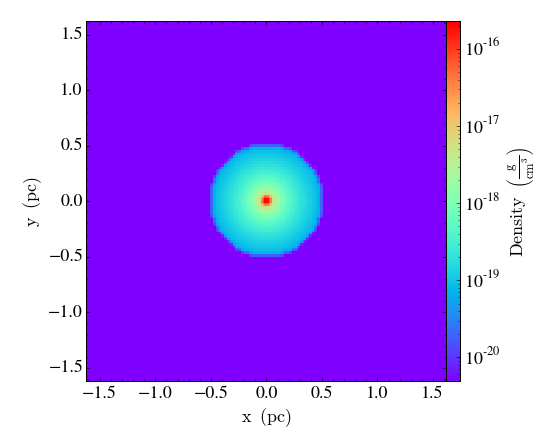

In [17]:
i=56
t_end_no_sink = compute_current_time(i)
print t_end_no_sink
plot_vmag(i)
plot_dens(i)

In [18]:
print t_end_sink/float(t_end_no_sink)

0.87427646442 code_time


##### for $\beta=0.1$, it crashed  in 8 timesteps( 559934.out)

In [19]:
cd ../beta_0.1/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/beta_0.1



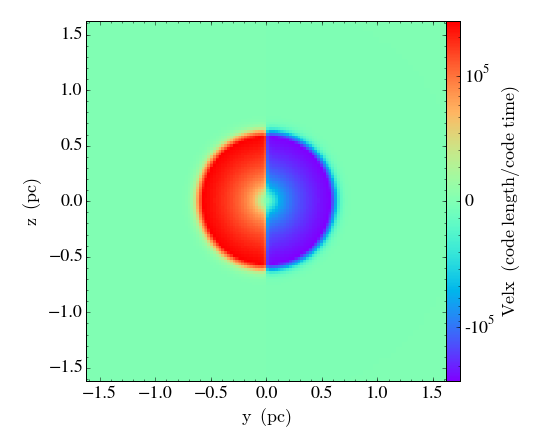

In [20]:
i = 0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velx"
slc = yt.SlicePlot(ds, "x",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.set_cmap("all","rainbow")
slc.show()


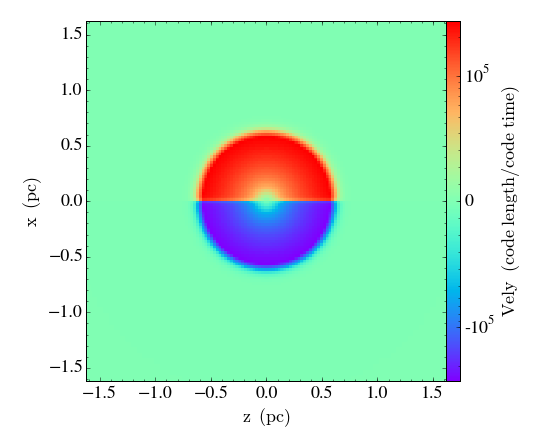

In [21]:
i = 0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="vely"
slc = yt.SlicePlot(ds, "y",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.set_cmap("all","rainbow")
slc.show()

0.0 code_time



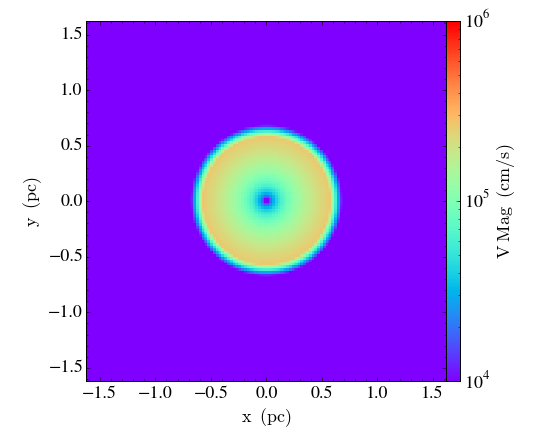


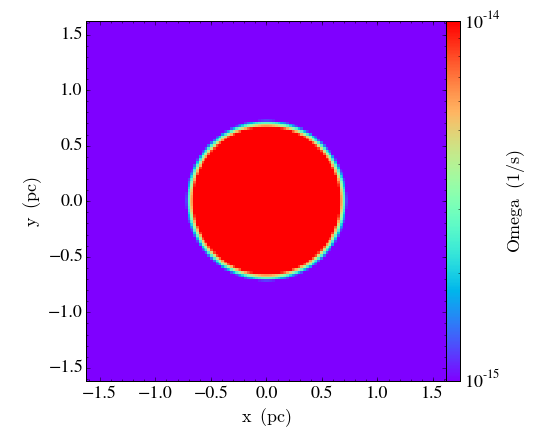

53554430000.0 code_time



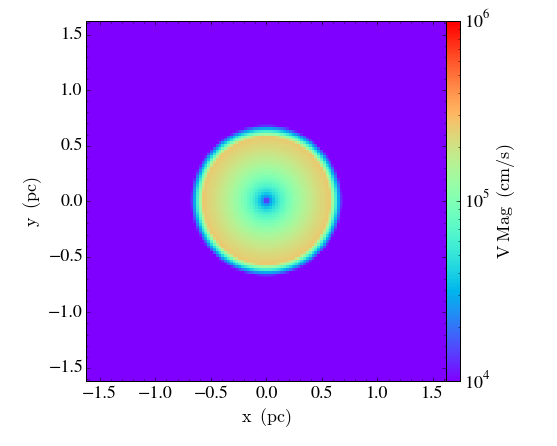


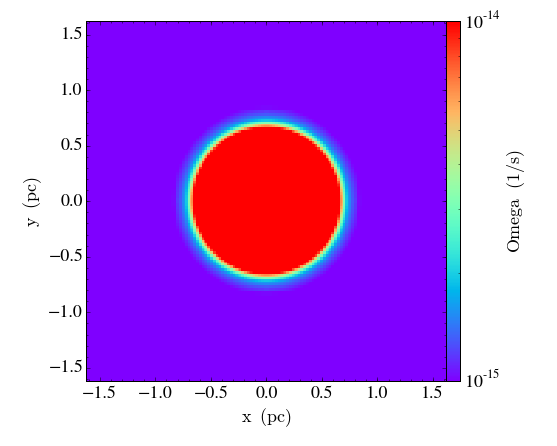

93554430000.0 code_time



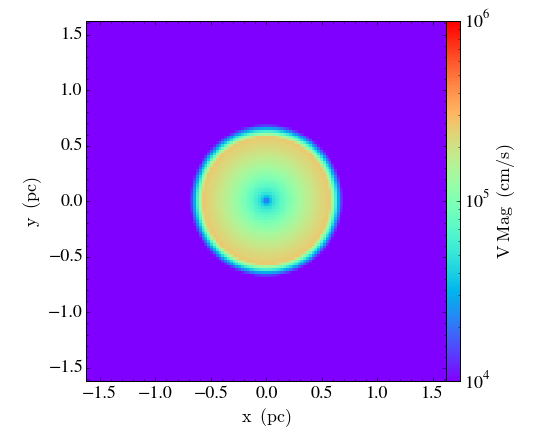


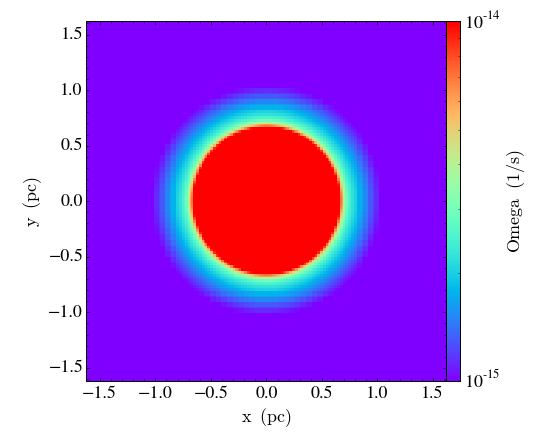

1.5355443e+11 code_time



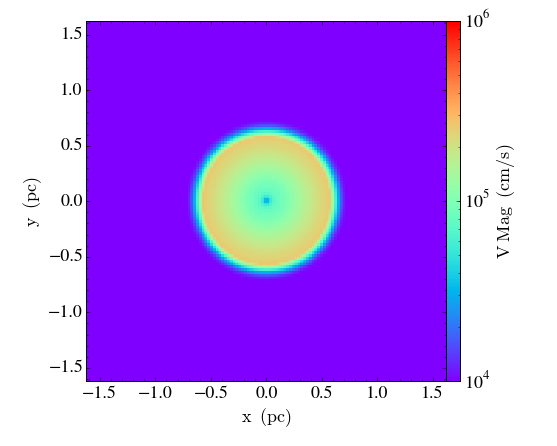


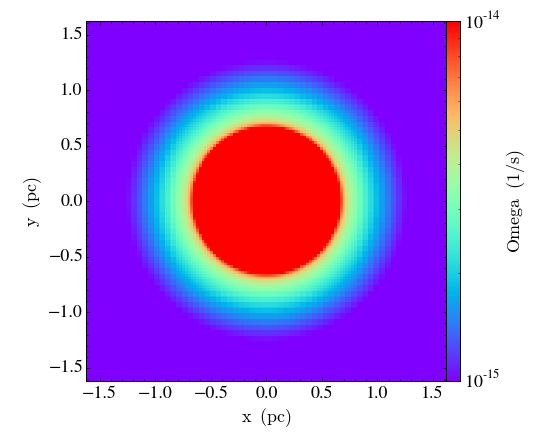

In [22]:
for i in [0,3,5,8]:
    print compute_current_time(i)
    plot_vmag(i,zmin=1e4,zmax=1e6)
    plot_omega(i,zmin=1e-15,zmax=1e-14)

In [23]:
cd ../0beta_no_sink/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/0beta_no_sink



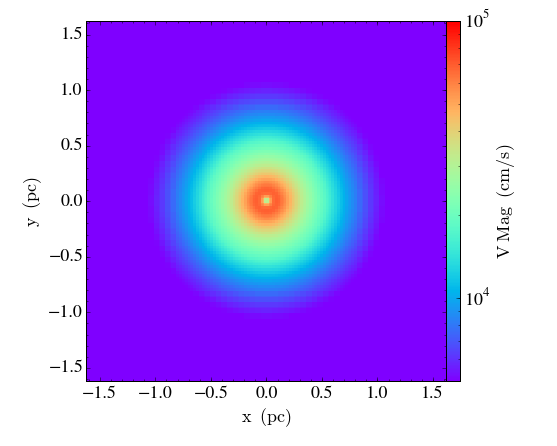

In [24]:
plot_vmag(8,zmin=5e3,zmax=1e5)


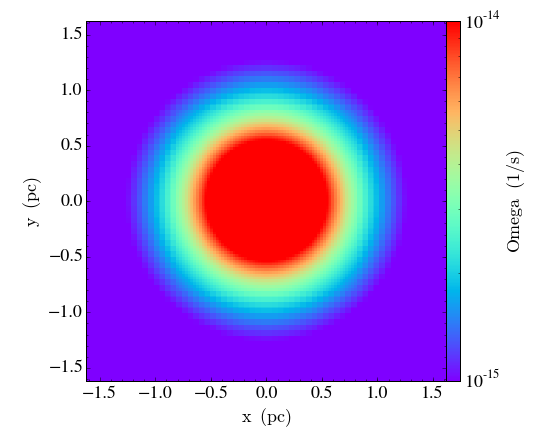

In [25]:
plot_omega(8,zmin=1e-15,zmax=1e-14)

In [26]:
cd ../beta_0.1/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/beta_0.1



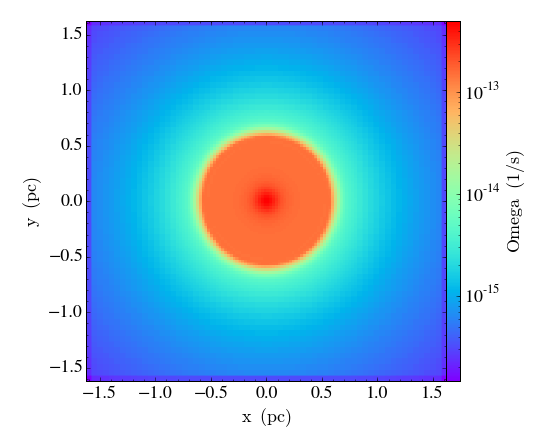

In [27]:
plot_omega(8)#,zmin=1e-15,zmax=1e-14)

In [33]:
cd ../beta_0.01/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/beta_0.01


In [36]:
compute_current_time(53)

1.05355443e+12 code_time


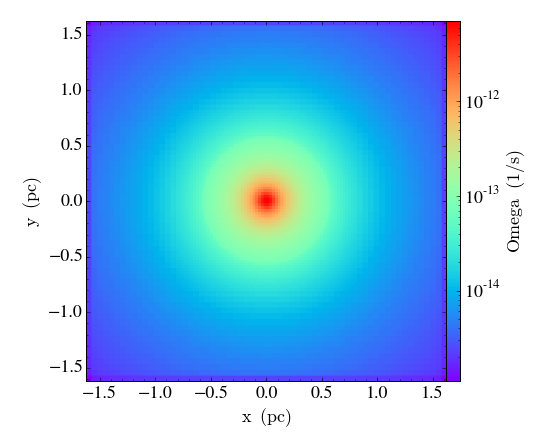

In [29]:
plot_omega(53)

0.0 code_time



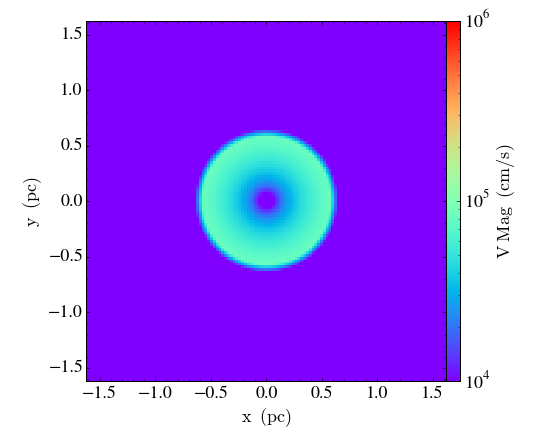


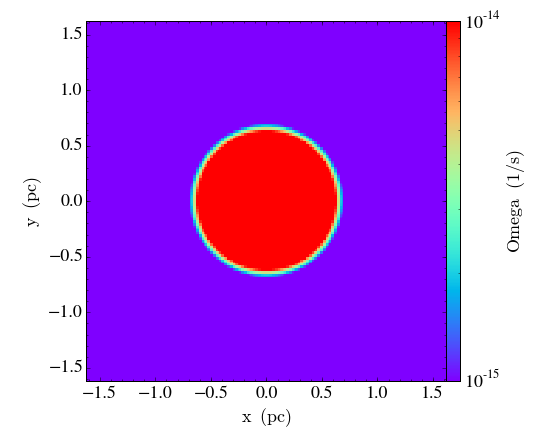

53554430000.0 code_time



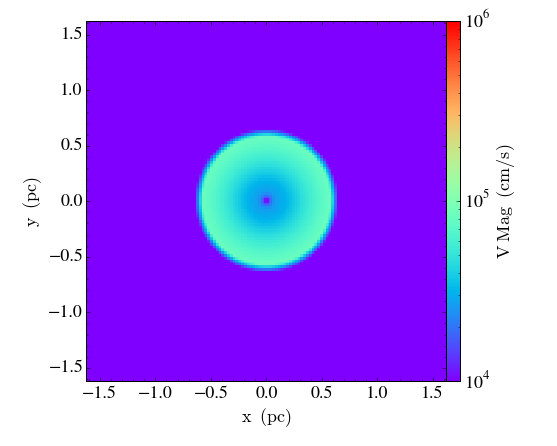


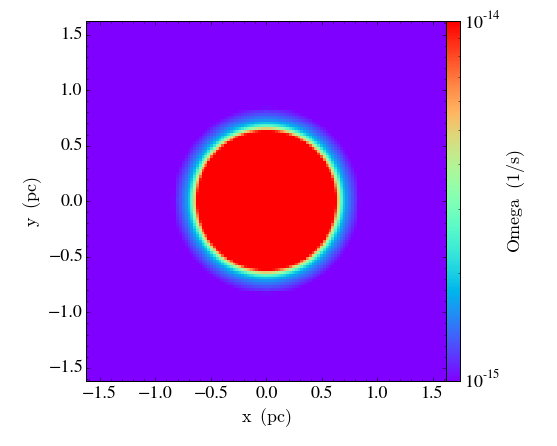

93554430000.0 code_time



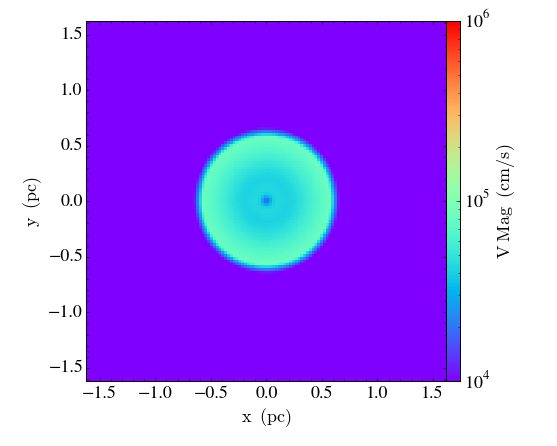


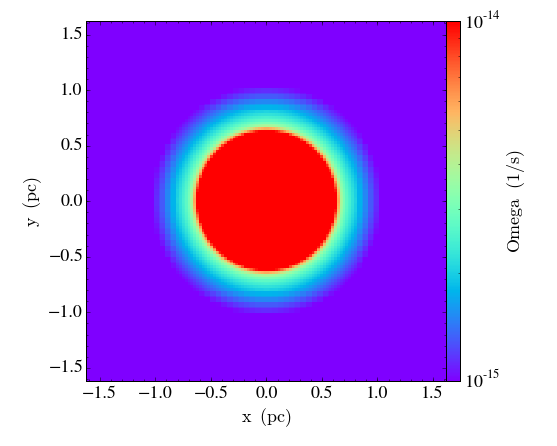

1.5355443e+11 code_time



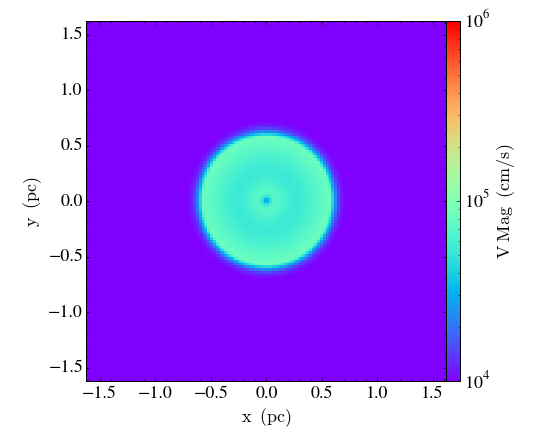


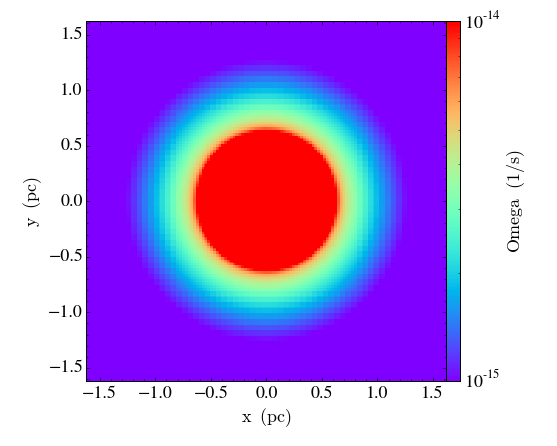

In [30]:
for i in [0,3,5,8]:
    print compute_current_time(i)
    plot_vmag(i,zmin=1e4,zmax=1e6)
    plot_omega(i,zmin=1e-15,zmax=1e-14)

0.0 code_time



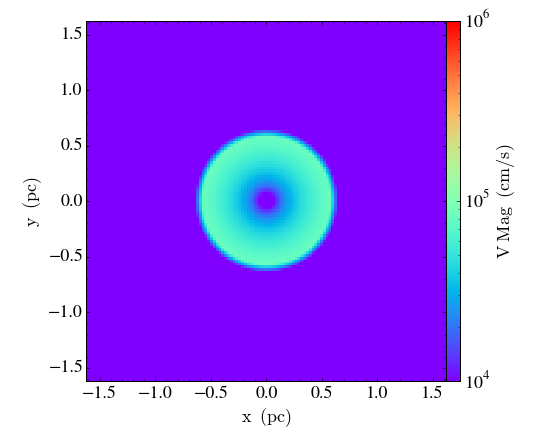


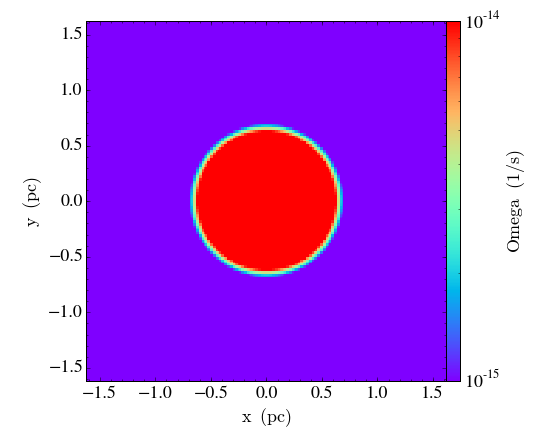

93554430000.0 code_time



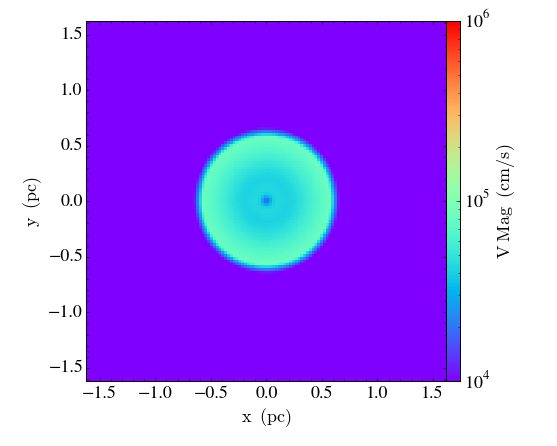


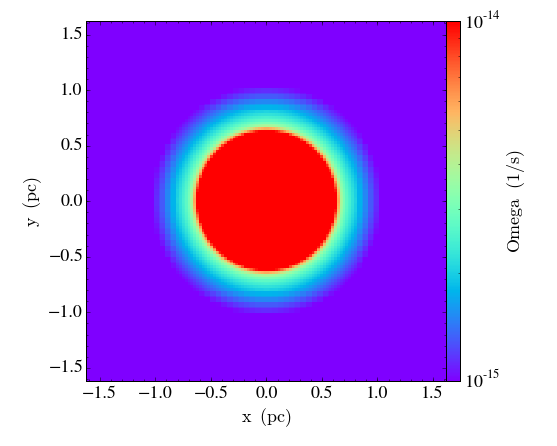

1.9355443e+11 code_time



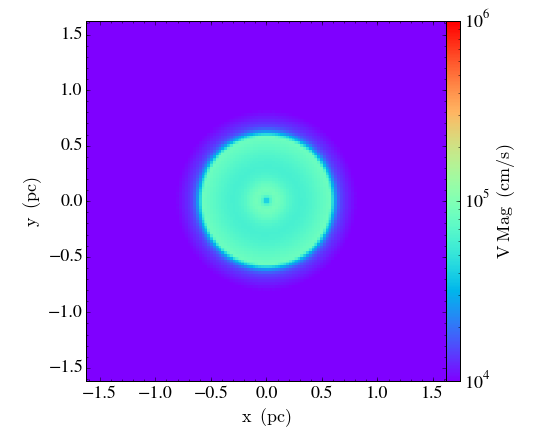


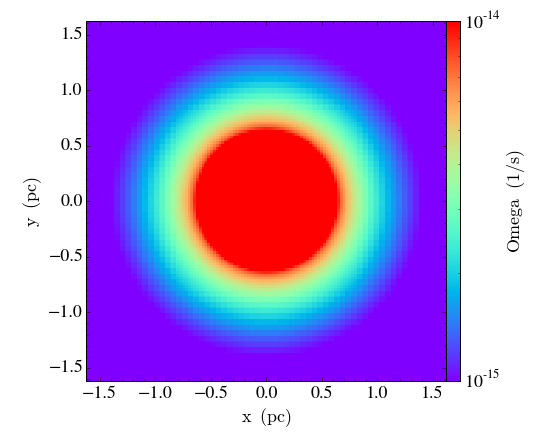

2.9355443e+11 code_time



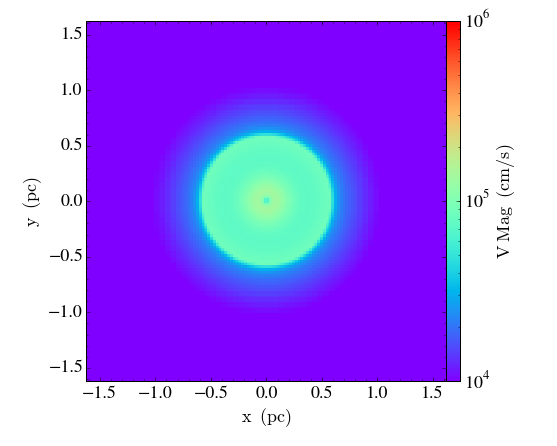


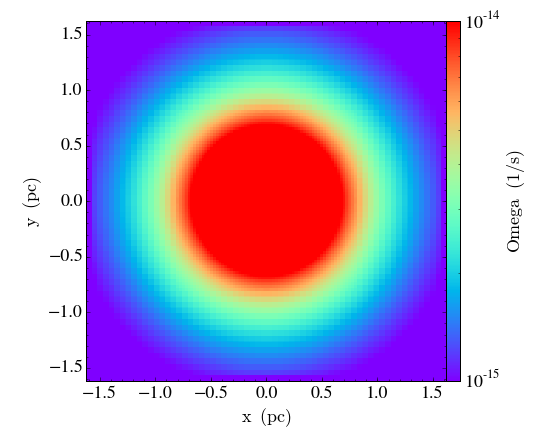

3.9355443e+11 code_time



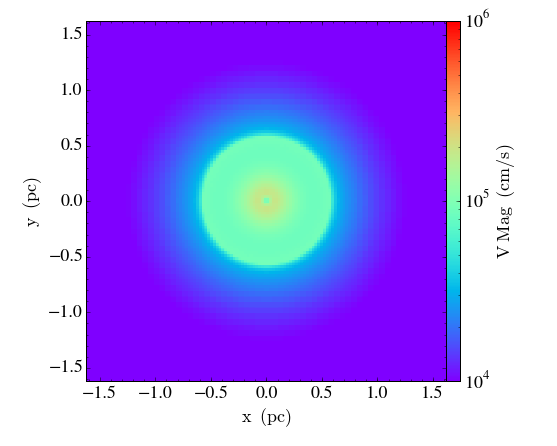


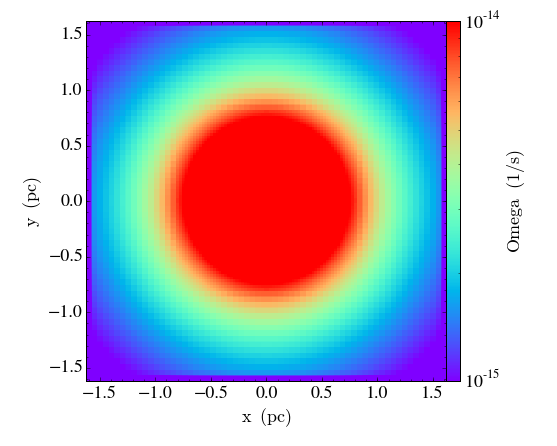

4.9355443e+11 code_time



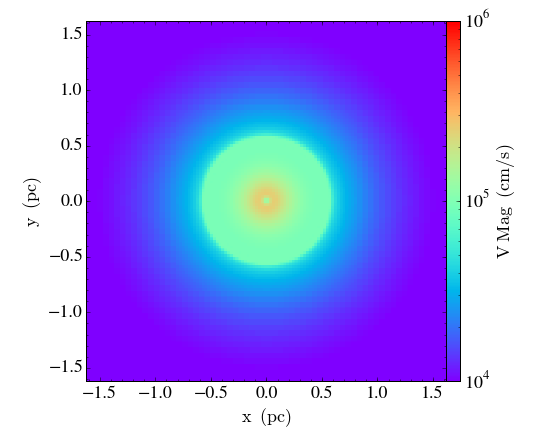


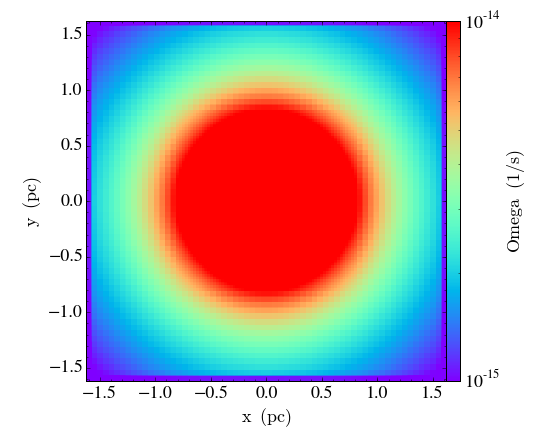

5.9355443e+11 code_time



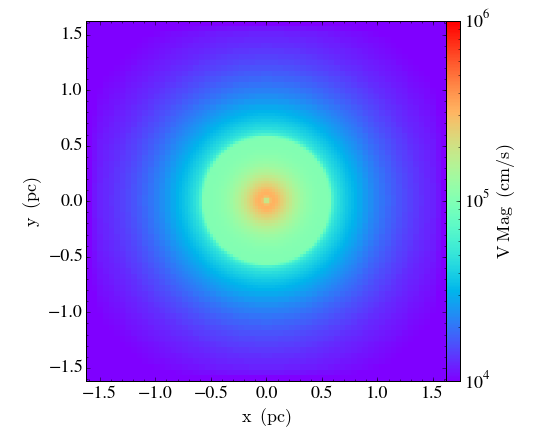


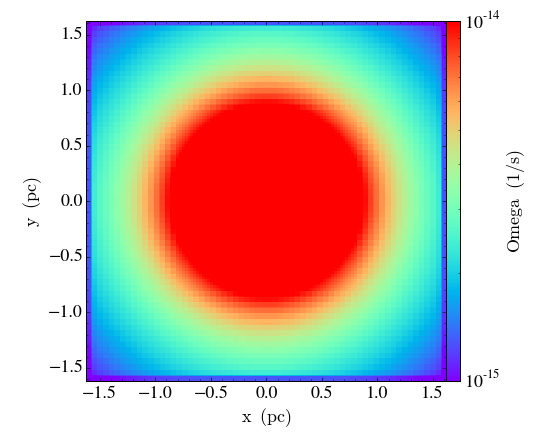

6.9355443e+11 code_time



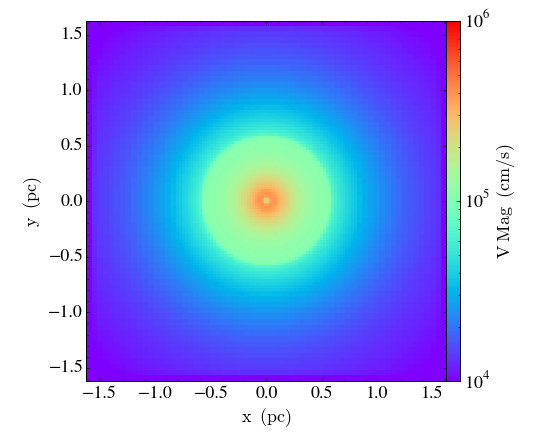


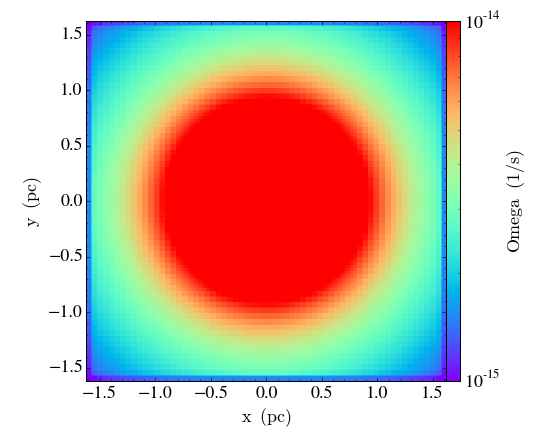

7.9355443e+11 code_time



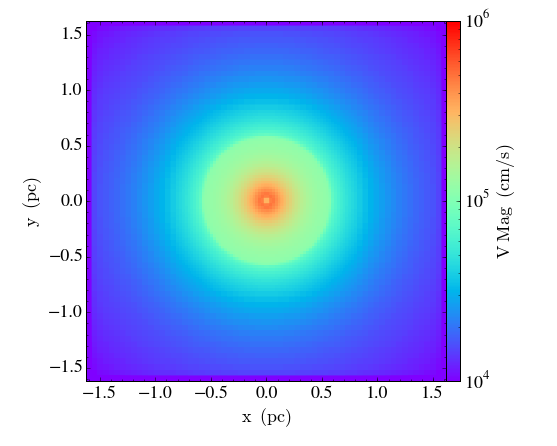


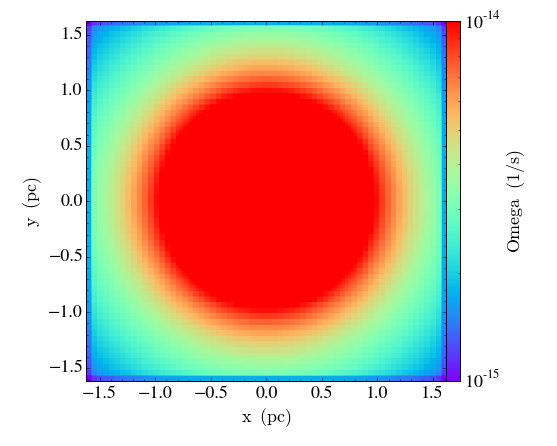

8.9355443e+11 code_time



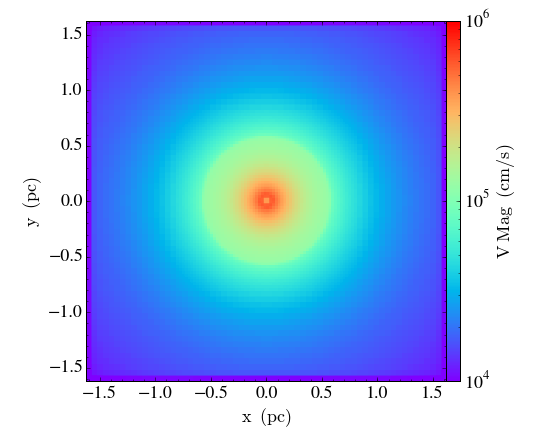


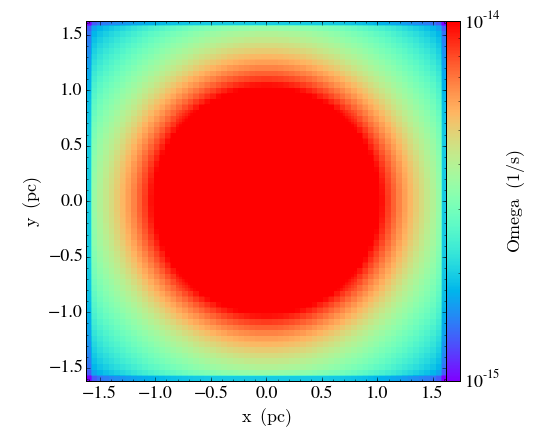

9.9355443e+11 code_time



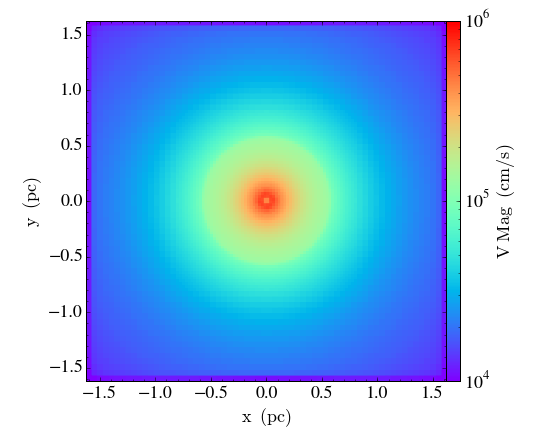


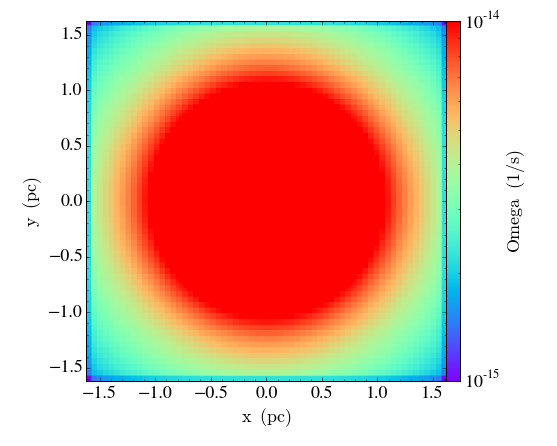

In [32]:
for i in np.arange(55):
    if i%5 ==0:
        print compute_current_time(i)
        plot_vmag(i,zmin=1e4,zmax=1e6)
        plot_omega(i,zmin=1e-15,zmax=1e-14)